## 带中介的调节效应的潜变量结构方程模型：调节效应通过中介因子实现

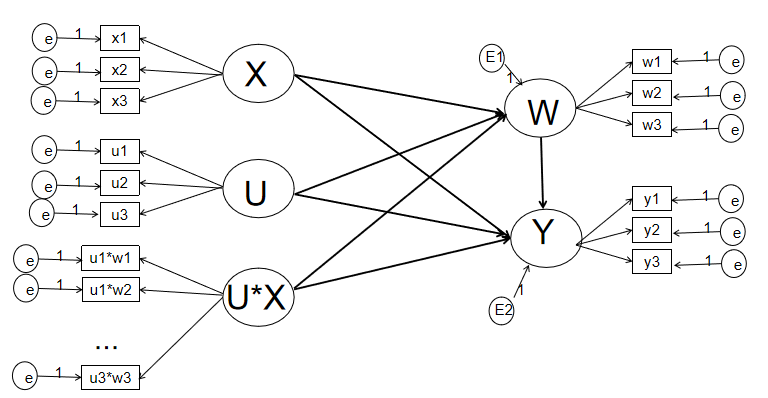

#### lavaan中实现

In [ ]:
# 载入数据
BASE <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_mod_med_latent.csv")

In [ ]:
# 双均值中心化法（double mean center）生成交互项
library(semTools)

BASE <- indProd(BASE,
        var1 = c("x1","x2","x3"),
        var2 = c("u1","u2","u3"),
        match = F, meanC = F,
        residualC = F, doubleMC = T)

In [ ]:
# 在lavaan中定义模型
MOD <- "
   # 定义测量模型
   X =~ x1 + x2 + x3
   Y =~ y1 + y2 + y3
   U =~ u1 + u2 + u3
   W =~ w1 + w2 + w3
   INT_XU =~ x1.u1 + x1.u2 + x1.u3 + x2.u1 + 
             x2.u2 + x2.u3 + x3.u1 + x3.u2 + x3.u3
   
   #定义结构模型（路径）
   Y ~ X + U + a*W + int_a*INT_XU
   W ~ b*X + U  + int_b*INT_XU

   ind_eff := a*b
   ind_eff := int_a*int_b

   # 潜变量交互项所有条目设置covariance
   x1.u1 ~~ x1.u2 + x1.u3 + x2.u1 + x2.u2 + x2.u3 + x3.u1 + x3.u2 + x3.u3
   x1.u2 ~~ x1.u3 + x2.u1 + x2.u2 + x2.u3 + x3.u1 + x3.u2 + x3.u3
   x1.u3 ~~ x2.u1 + x2.u2 + x2.u3 + x3.u1 + x3.u2 + x3.u3
   x2.u1 ~~ x2.u2 + x2.u3 + x3.u1 + x3.u2 + x3.u3
   x2.u2 ~~ x2.u3 + x3.u1 + x3.u2 + x3.u3
   x2.u3 ~~ x3.u1 + x3.u2 + x3.u3
   x3.u1 ~~ x3.u2 + x3.u3
   x3.u2 ~~ x3.u3
"

In [ ]:
# 拟合模型
library(lavaan)
MOD_fit <- sem(MOD,BASE)

In [ ]:
# 提取统计结果
summary(MOD_fit,
        fit.measures = TRUE, 
        standardized = TRUE,
        modindices = TRUE, 
        rsq = TRUE)

### 实例：

#### 来源：
杨文圣, 牟家增, 李博文, 王佳颖. (2019). 主动性人格与员工行为的关系：政治技能视角下有中介的调节模型. 心理科学, 42(6), 1488–1454.

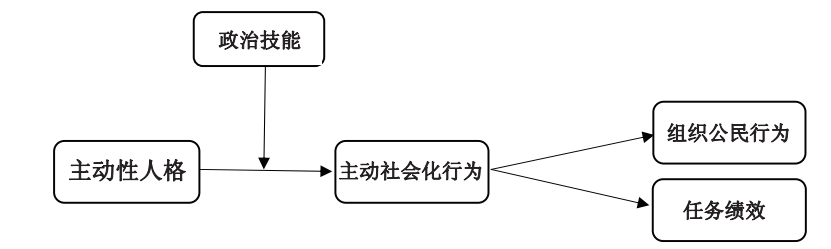

原文中采用“化潜变量为显变量”的做法，即用变量均值或总分代表该变量水平，而不是用潜变量的方式。

我们采用潜变量结构方程模型的方式，假设每个潜变量有3个条目（原文中更多，这使得潜变量模型变得困难）

#### 在lavaan中实现


In [ ]:
# 导入数据
BASE <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_mod_med_latent_practice.csv")
head(BASE)
# 导入函数库
library(semTools)

In [ ]:
# double mean centered
BASE <- indProd(BASE,
                var1 = c("zdrg1","zdrg2","zdrg3"),
                var2 = c("zzjn1","zzjn2","zzjn3"),
                match = F, meanC = T,
                residualC = F, doubleMC = T)
head(BASE)

In [ ]:
# 定义模型
MOD <- "
   # 定义测量模型
   主动性人格 =~ zdrg1 + zdrg2 + zdrg3
   政治技能 =~ zzjn1 + zzjn2 + zzjn3
   主动社会化行为 =~ zdshh1 + zdshh2 + zdshh3
   组织公民行为 =~ zzgmxw1 + zzgmxw2 + zzgmxw3
   任务绩效 =~ rwzj1 + rwzj2 + rwzj3
   
   INT_XU =~ zdrg1.zzjn1 + zdrg1.zzjn2 + zdrg1.zzjn3 + 
            zdrg2.zzjn1 + zdrg2.zzjn2 + zdrg2.zzjn3 +
            zdrg3.zzjn1 + zdrg3.zzjn2 + zdrg3.zzjn3 
   
   # 潜变量交互项所有条目设置covariance
   zdrg1.zzjn1 ~~ zdrg1.zzjn2 + zdrg1.zzjn3 + zdrg2.zzjn1 + 
                  zdrg2.zzjn2 + zdrg2.zzjn3 + zdrg3.zzjn1 + zdrg3.zzjn2 + zdrg3.zzjn3
   zdrg1.zzjn2 ~~ zdrg1.zzjn3 + zdrg2.zzjn1 + zdrg2.zzjn2 + 
                  zdrg2.zzjn3 + zdrg3.zzjn1 + zdrg3.zzjn2 + zdrg3.zzjn3
   zdrg1.zzjn3 ~~ zdrg2.zzjn1 + zdrg2.zzjn2 + zdrg2.zzjn3 +
                  zdrg3.zzjn1 + zdrg3.zzjn2 + zdrg3.zzjn3
   zdrg2.zzjn1 ~~ zdrg2.zzjn2 + zdrg2.zzjn3 + zdrg3.zzjn1 + 
                  zdrg3.zzjn2 + zdrg3.zzjn3
   zdrg2.zzjn2 ~~ zdrg2.zzjn3 + zdrg3.zzjn1 + zdrg3.zzjn2 + 
                  zdrg3.zzjn3
   zdrg2.zzjn3 ~~ zdrg3.zzjn1 + zdrg3.zzjn2 + zdrg3.zzjn3
   zdrg3.zzjn1 ~~ zdrg3.zzjn2 + zdrg3.zzjn3
   zdrg3.zzjn2 ~~ zdrg3.zzjn3
   
   #定义结构模型（路径）
   组织公民行为 ~ 主动性人格 + 政治技能 + a1*主动社会化行为 + int_a1*INT_XU
   任务绩效 ~ 主动性人格 + 政治技能 + a2*主动社会化行为 + int_a2*INT_XU
   主动社会化行为 ~ b*主动性人格 + 政治技能 + int_b*INT_XU

   ind_eff1 := a1*b
   ind_eff2 := a2*b
   ind_eff3 := int_a1*int_b
   ind_eff4 := int_a2*int_b
"

## 带调剂的中介效应的潜变量结构方程模型：中介效应被调节因子调节

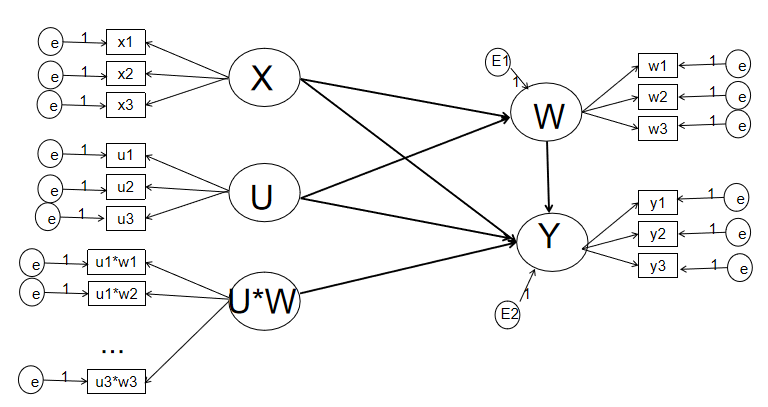

In [ ]:
# 读取数据
BASE <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_mod_med_latent.csv")
head(BASE)

In [ ]:
# 定义交互项
BASE <- indProd(BASE,
                var1 = c("w1","w2","w3"),
                var2 = c("u1","u2","u3"),
                match = F, meanC = F,
                residualC = F, doubleMC = T)

In [ ]:
# 在lavaan中定义模型
MOD <- "
   # 定义测量模型
   X =~ x1 + x2 + x3
   Y =~ y1 + y2 + y3
   U =~ u1 + u2 + u3
   W =~ w1 + w2 + w3
   INT_wU =~ w1.u1 + w1.u2 + w1.u3 + w2.u1 + w2.u2 + w2.u3 + w3.u1 + w3.u2 + w3.u3
   
   #定义结构模型（路径）
   Y ~ X + U + a*W + INT_wU
   W ~ b*X + U 

   ind_eff := a*b
"

In [ ]:
# 拟合模型
library(lavaan)
MOD_fit <- sem(MOD,BASE)

In [ ]:
# 提取统计结果
summary(MOD_fit,
        fit.measures = TRUE, 
        standardized = TRUE,
        modindices = TRUE, 
        rsq = TRUE)

### 实例：
徐夫真, 张文新, & 张玲玲. (2009). 家庭功能对青少年疏离感的影响: 有调节的中介效应. 心理学报, 41(12), 1165-1174.

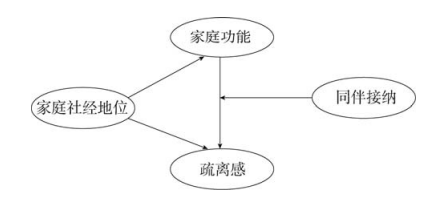

#### 假设各变量有三个条目，在lavaan中演示：

In [ ]:
# 导入数据
BASE <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_mod_med_latent_practice2.csv")
head(BASE)

In [ ]:
#在lavaan中定义模型
MOD <- "
   # 定义测量模型
   家庭经济地位 =~ jtjjdw1 + jtjjdw2 + jtjjdw3
   家庭功能 =~ jtgn1 + jtgn2 + jtgn3
   疏离感 =~ slg1 + slg2 + slg3
   同伴接纳 =~ tbjn1 + tbjn2 + tbjn3
   INT_wU =~ jtgn1.tbjn1 + jtgn1.tbjn2 + jtgn1.tbjn3 + jtgn2.tbjn1 + jtgn2.tbjn2 + 
             jtgn2.tbjn3 + jtgn3.tbjn1 + jtgn3.tbjn2 + jtgn3.tbjn3
             
   #定义结构模型（路径）
   疏离感 ~ 家庭经济地位 + 同伴接纳 + a*家庭功能 + INT_wU
   家庭功能 ~ b*家庭经济地位 + 同伴接纳 

   ind_eff := a*b
"

In [ ]:
# 拟合模型
library(lavaan)
MOD_fit <- sem(MOD,BASE)

In [ ]:
# 提取统计结果
summary(MOD_fit,
        fit.measures = TRUE, 
        standardized = TRUE,
        modindices = TRUE, 
        rsq = TRUE)